<a href="https://colab.research.google.com/github/matusoff/Molecular_dynamics/blob/main/RDKit_for_Cheminformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.Draw import SimilarityMaps

from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.9 MB/s eta 0:00:00


##Loading Molecular Representations into RDKit

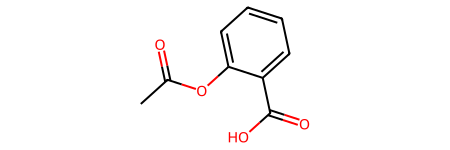

In [38]:
aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin

In [5]:
type(aspirin)

rdkit.Chem.rdchem.Mol

In [6]:
Chem.inchi.MolToInchi(aspirin)

'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)'

##Visualizing Chemical Structures

In [7]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

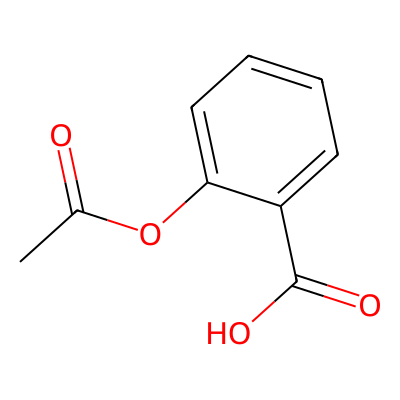

In [8]:
Chem.Draw.MolToImage(aspirin, size=(400,400))

In [55]:
from rdkit import Chem
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

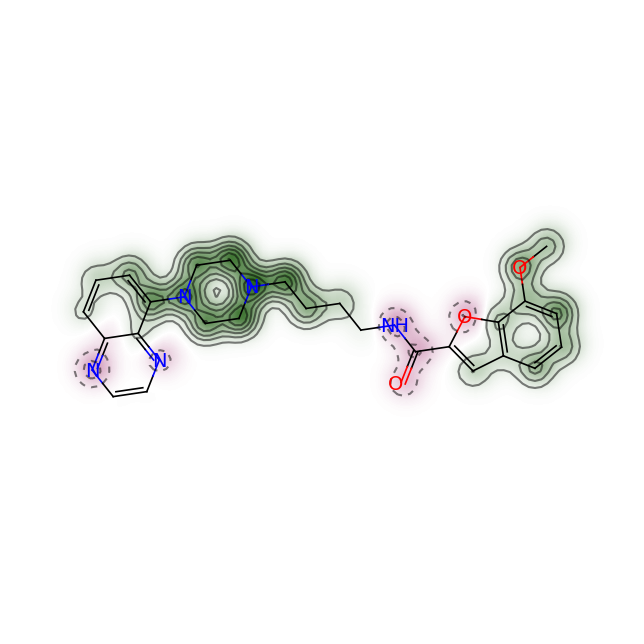

In [56]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

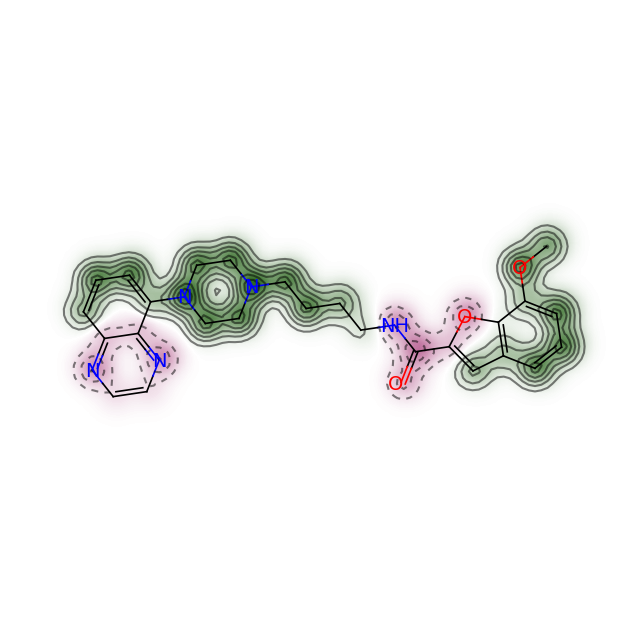

In [57]:
from rdkit import DataStructs
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), metric=DataStructs.TanimotoSimilarity)

##Grids of Chemical Structures

In [29]:
df = pd.read_csv('/content/sample_data/amino_acid_SMILES.csv', skiprows=0)
df

,name,SMILES
0,alanine,C[C@@H](C(=O)[O-])[NH3+]
1,arginine,[NH3+][C@@H](CCCNC(=[NH2+])N)C(=O)[O-]
2,asparagine,O=C(N)C[C@H]([NH3+])C(=O)[O-]
3,aspartate,C([C@@H](C(=O)[O-])[NH3+])C(=O)[O-]
4,cysteine,C([C@@H](C(=O)[O-])[NH3+])S
5,glutamine,[NH3+][C@@H](CCC(=O)N)C([O-])=O
6,glutamate,C(CC(=O)[O-])[C@@H](C(=O)[O-])[NH3+]
7,glycine,C(C(=O)[O-])[NH3+]
8,histidine,O=C([C@H](CC1=CNC=N1)[NH3+])[O-]
9,isoleucine,CC[C@H](C)[C@@H](C(=O)[O-])[NH3+]


In [30]:
AminoAcids = [Chem.MolFromSmiles(SMILES) for SMILES in df['SMILES']]
AminoAcids

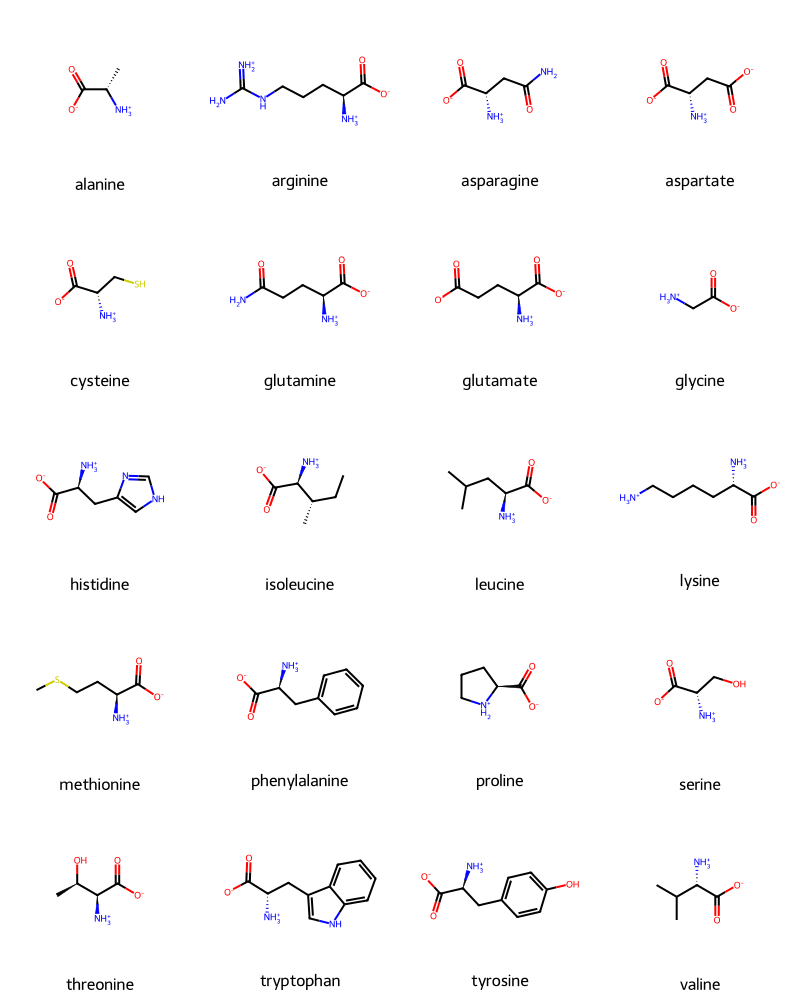

In [31]:
Chem.Draw.MolsToGridImage(AminoAcids,
                          molsPerRow=4,         #the number of molecules per row
                          subImgSize=(200,200), #pixel dimensions
                          legends=list(df['name']), #labels
                          useSVG=True)

In [9]:
#ave the image to a file
Chem.Draw.MolToFile(aspirin, 'aspirin.svg',
                    size=(500,500),
                    imageType='svg')

In [10]:
cinn_acid = Chem.MolFromSmiles('O=C(O)\C=C\c1ccccc1')
image = Chem.Draw.MolToImage(cinn_acid)

Assigning Stereochemistry
to assign the absolute stereochemistry of a molecule. As an example, below we have a single isomer of pent-3-en-2-ol which has a single chiral center and an alkene that could potentially be either E or Z. Let’s have RDKit tell us the absolute configuration (i.e., R or S) of the tetrahedral chiral center and if the alkene is E or Z. First, we will load the SMILES representation of this compound, O[C@@H](C)/C=C/C, which contains both @ and / symbols, so we know the stereochemistry is assigned in this representation. When we visualize it below, we can see a wedge for the methyl on the chiral center instead of a regular line, for example.

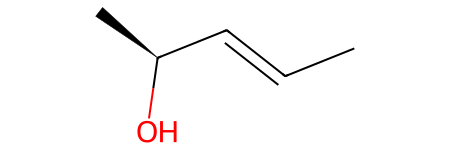

In [16]:
pentenol = Chem.MolFromSmiles('O[C@@H](C)/C=C/C')
pentenol

To obtain the absolute configuration (i.e.,R or S), we can use the Chem.FindMolChiralCenters() function which returns the absolute configuration and an index indication which atom has that configuration.

In [12]:
Chem.FindMolChiralCenters(pentenol)

[(1, 'S')]

In [13]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True

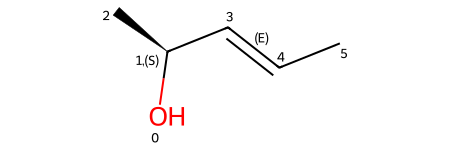

In [14]:
pentenol

To obtain the stereochemistry of double bonds, we can iteration through the bonds and obtain the stereochemistry using the GetStereo() bond method as shown below. There are three possible outputs list below.

In [15]:
for bond in pentenol.GetBonds():
    print(bond.GetStereo())

STEREONONE
STEREONONE
STEREONONE
STEREOE
STEREONONE


In [16]:
retinoic = Chem.MolFromSmiles('O=C(O)\C=C(\C=C\C=C(/C=C/C1=C(/CCCC1(C)C)C)C)C')

for bond in retinoic.GetBonds():
    print(bond.GetStereo())

STEREONONE
STEREONONE
STEREONONE
STEREOE
STEREONONE
STEREOE
STEREONONE
STEREOZ
STEREONONE
STEREOE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE


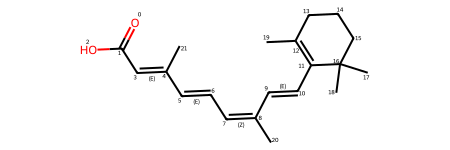

In [21]:
retinoic


##Counting and Generating Isomers

In [22]:
Chem.EnumerateStereoisomers.GetStereoisomerCount(pentenol)

1

In [23]:
hexanol = Chem.MolFromSmiles('OC(C)CCCC')
Chem.EnumerateStereoisomers.GetStereoisomerCount(hexanol)

2

In [24]:
isomers = list(Chem.EnumerateStereoisomers.EnumerateStereoisomers(hexanol))
isomers

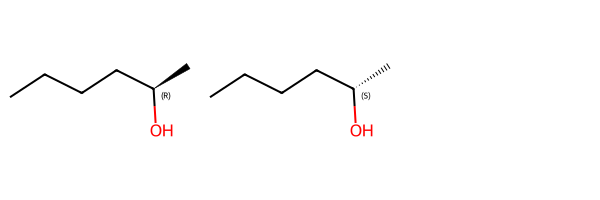

In [25]:
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

Chem.Draw.MolsToGridImage(isomers)

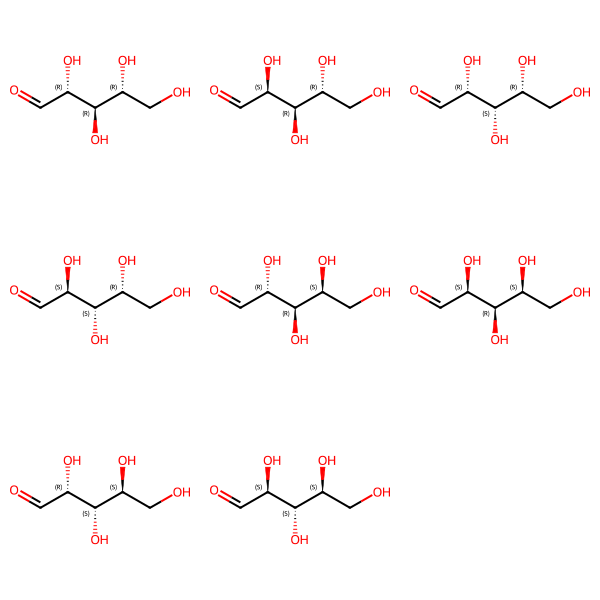

In [26]:
arabinos = Chem.MolFromSmiles('O=CC(O)C(O)C(O)CO')
isomers = list(Chem.EnumerateStereoisomers.EnumerateStereoisomers(arabinos))
Chem.Draw.MolsToGridImage(isomers, useSVG=True)

In [27]:
TriCProp = Chem.MolFromSmiles('CC1C(C1C)C ')
Chem.EnumerateStereoisomers.GetStereoisomerCount(TriCProp)

1

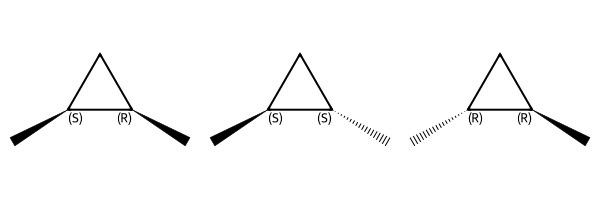

In [28]:
DiCProp = Chem.MolFromSmiles('CC1CC1C')
CPropisomers = list(Chem.EnumerateStereoisomers.EnumerateStereoisomers(DiCProp))
Chem.Draw.MolsToGridImage(CPropisomers)

##Chem.Descriptor Module
Molecular Features

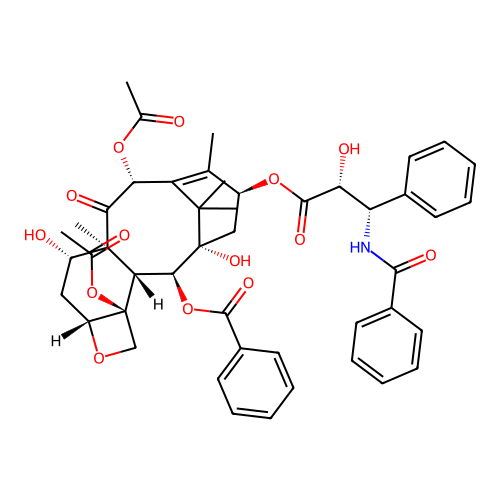

In [3]:
ptx = Chem.MolFromSmiles('CC1=C2[C@@]([C@]([C@H]([C@@H]3[C@]4([C@H](OC4)C[C@@H]'\
                         '([C@]3(C(=O)[C@@H]2OC(=O)C)C)O)OC(=O)C)OC(=O)c5ccccc5)'\
                         '(C[C@@H]1OC(=O)[C@H](O)[C@@H](NC(=O)c6ccccc6)c7ccccc7)O)(C)C')
Chem.Draw.MolToImage(ptx, size=(500,500))

In [4]:
# molecular weight
Chem.Descriptors.MolWt(ptx)

853.9180000000003

In [5]:
# number of rings
Chem.Descriptors.RingCount(ptx)

7

In [6]:
# number of aromatic rings
Chem.Descriptors.NumAromaticRings(ptx)

3

In [7]:
# number of valence electrons
Chem.Descriptors.NumValenceElectrons(ptx)

328

In [8]:
# number of rotable bonds
Chem.Descriptors.NumRotatableBonds(ptx)

10

##Quantifying Functional Groups
Function           Functional Group

fr_Al_OH()      Aliphatic alcohols

fr_aldehyde()   Aldehydes

fr_amide()      Amide

fr_C_C()        Carbonyl oxygens

fr_guanido()    Guanidine

fr_NH0()        Amines with 0 H’s (i.e., tertiary)

fr_phenol()     Phenol

fr_phos_ester() Phosphoric ester

fr_SH()         Thiol

In [9]:
# number of benzene rings
Chem.Descriptors.fr_benzene(ptx)

3

In [10]:
# number of alphatic alcohols
Chem.Descriptors.fr_Al_OH(ptx)

3

In [11]:
# number of aromatic carboxyls
Chem.Descriptors.fr_Ar_COO(ptx)

0

In [12]:
# number of esters
Chem.Descriptors.fr_ester(ptx)

4

##Searching Molecules for Structural Patterns

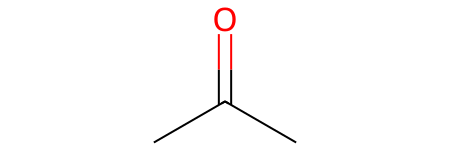

In [13]:
acetone = Chem.MolFromSmiles('CC(=O)C')
acetone

In [14]:
substructure = Chem.MolFromSmiles('C=O')
acetone.HasSubstructMatch(substructure)

True

In [17]:
pentenol.HasSubstructMatch(substructure)

False

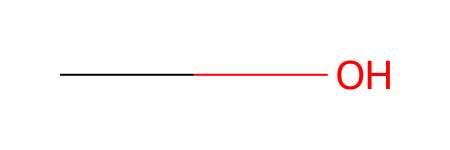

In [18]:
substructure = Chem.MolFromSmiles('CO')
substructure

In [19]:
acetone.HasSubstructMatch(substructure)

False

In [20]:
pentenol.HasSubstructMatch(substructure)

True

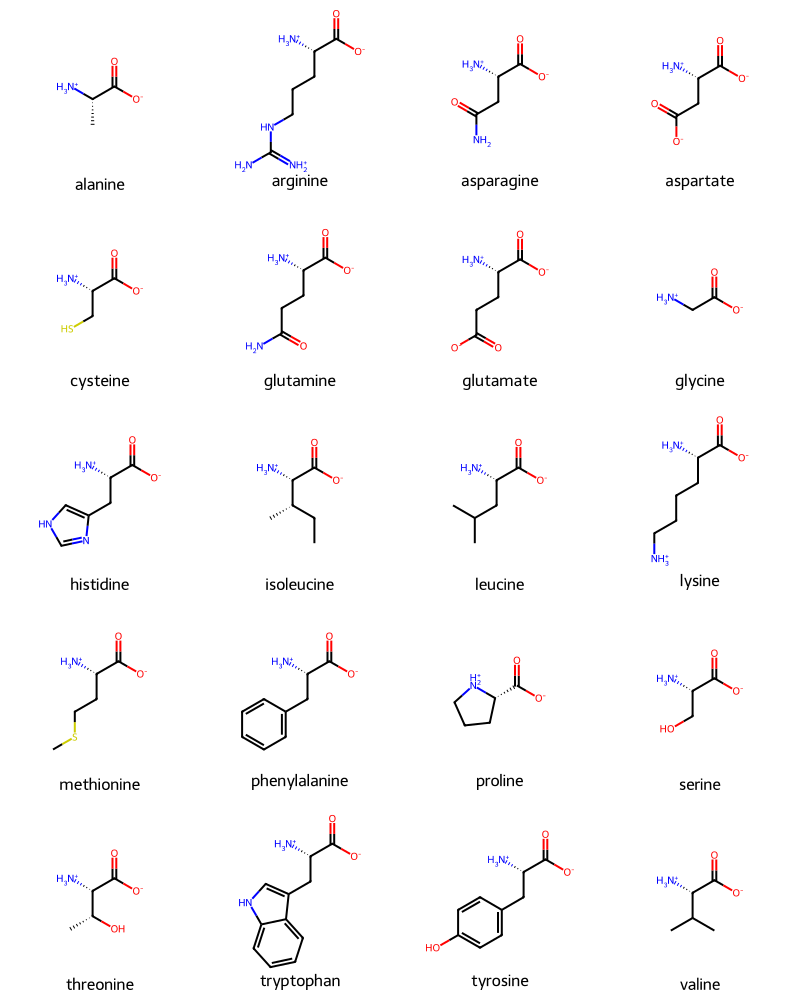

In [32]:
# seraches for substruture
substructure= Chem.MolFromSmiles('C(C(=O)[O-])[NH3+]')
matching_amino_acids = [AA for AA in AminoAcids if AA.HasSubstructMatch(substructure)]

# orients common substructures the same way
AllChem.Compute2DCoords(substructure)
for amino_acid in matching_amino_acids:
    _ = AllChem.GenerateDepictionMatching2DStructure(amino_acid, substructure)

# generates grid of matching molecules
Chem.Draw.MolsToGridImage(matching_amino_acids,
                          molsPerRow=4,
                          subImgSize=(200,200),
                          legends=list(df['name']))

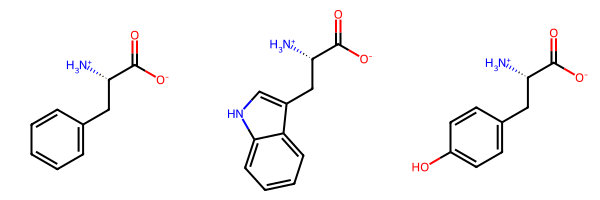

In [33]:
substructure = Chem.MolFromSmiles('c1ccccc1')
AA_with_pattern = [AA for AA in AminoAcids if AA.HasSubstructMatch(substructure)]

Chem.Draw.MolsToGridImage(AA_with_pattern)

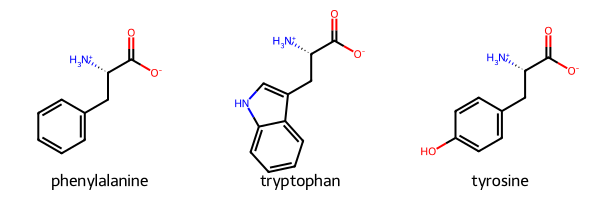

In [34]:
AA_zipped = list(zip(df['name'], AminoAcids))

substructure = Chem.MolFromSmiles('c1ccccc1')
with_pattern = [AA for AA in AA_zipped if AA[1].HasSubstructMatch(substructure)]

name = [AA[0] for AA in with_pattern]
mol_obj =  [AA[1] for AA in with_pattern]

Chem.Draw.MolsToGridImage(mol_obj, legends=name)

##Fingerprint Functions from the SimilarityMaps Submodule

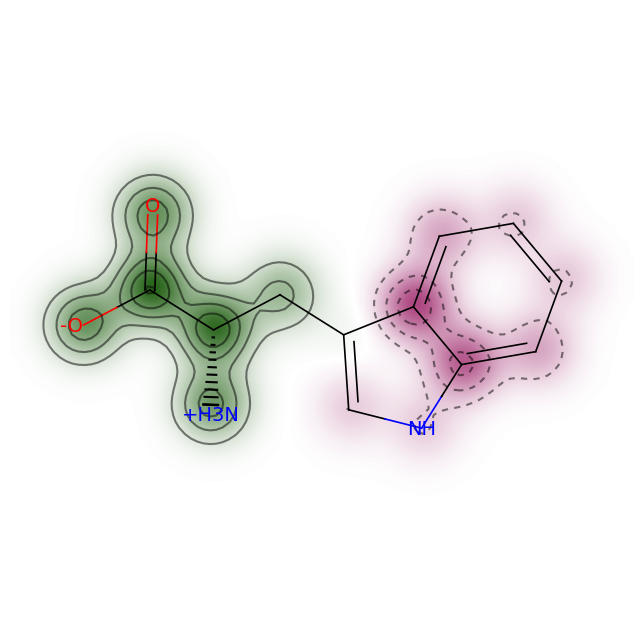

In [36]:
probe_mol = Chem.MolFromSmiles('c1[nH]c2ccccc2c1C[C@H]([NH3+])C(=O)[O-]') # tryptophan
ref_mol = Chem.MolFromSmiles('O=C([C@H](CC1=CNC=N1)[NH3+])[O-]') # histidine

fp_func = SimilarityMaps.GetMorganFingerprint
figure, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, probe_mol, fp_func)

##Atoms and Bonds

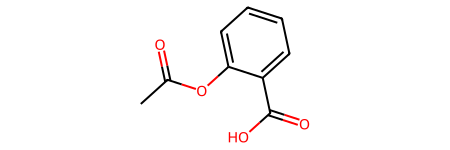

In [39]:
aspirin

In [40]:
[atom.GetDegree() for atom in aspirin.GetAtoms()]

[1, 3, 1, 2, 3, 2, 2, 2, 2, 3, 3, 1, 1]

In [41]:
[atom.GetNumImplicitHs() for atom in aspirin.GetAtoms()]

[0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]

In [42]:
Chem.Descriptors.MolWt(aspirin)

180.15899999999996

In [43]:
for atom in aspirin.GetAtoms():
    if atom.GetAtomicNum() == 6 and \
        not atom.GetIsAromatic() and \
        atom.GetTotalNumHs() == 0:

        atom.SetIsotope(13)

182.14370968


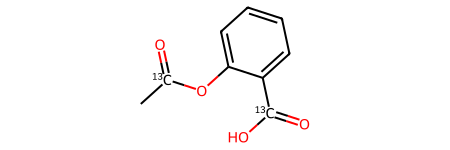

In [44]:
print(Chem.Descriptors.MolWt(aspirin))
aspirin

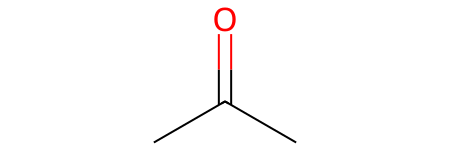

In [45]:
acetone

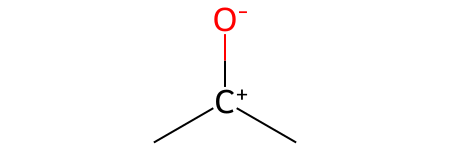

In [46]:
for bond in acetone.GetBonds():
    if bond.GetBondType() == Chem.BondType.DOUBLE:
        bond.SetBondType(Chem.BondType.SINGLE)
        end = bond.GetEndAtom().SetFormalCharge(-1)
        begin = bond.GetBeginAtom().SetFormalCharge(+1)
acetone

##Calculating Partial Charges

In [58]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
AllChem.ComputeGasteigerCharges(m)
m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.04769375004654255

##Visualization of Descriptors
The Gasteiger partial charges can be visualized as (using a different color scheme):

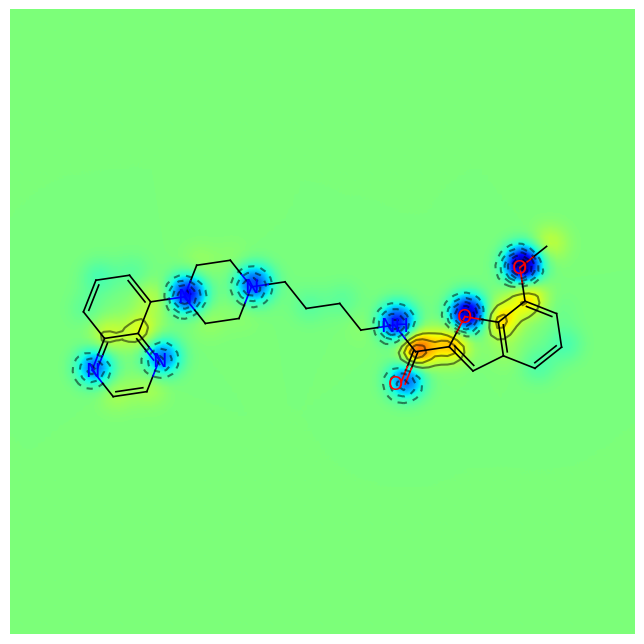

In [59]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

Or for the Crippen contributions to logP:

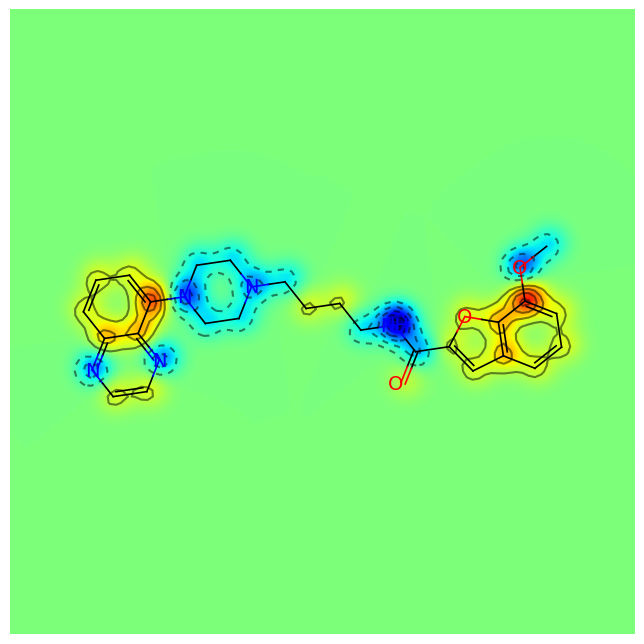

In [60]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

##Chemical Features and Pharmacophores
Chemical Features
Chemical features in the RDKit are defined using a SMARTS-based feature definition language (described in detail in the RDKit book). To identify chemical features in molecules, you first must build a feature factory:

In [61]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [62]:
m = Chem.MolFromSmiles('OCc1ccccc1CN')
feats = factory.GetFeaturesForMol(m)
len(feats)

8

In [65]:
print(feats[0].GetFamily())
print(feats[0].GetType())
print(feats[0].GetAtomIds())
print(feats[4].GetFamily())
print(feats[4].GetAtomIds())

Donor
SingleAtomDonor
(0,)
Aromatic
(2, 3, 4, 5, 6, 7)
